In [1]:
!nvidia-smi

Fri Apr  8 17:24:16 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    31W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
batch_size = 128
num_classes = 10
epochs = 20

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
input_layer = keras.layers.Input(x_train.shape[1:])

x = Conv2D(32, (3, 3), padding='same')(input_layer)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Conv2D(32, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)

x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)

x = Flatten()(x)

x = Dense(units=512)(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(0.5)(x)

out = Dense(units=num_classes, activation="softmax")(x)

model = keras.models.Model(inputs=[input_layer], outputs=[out])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                             

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,  
                                   fill_mode="constant", 
                                   cval=0., 
                                   dtype="float32")

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size)

validation_generator = test_datagen.flow(x_test, y_test, batch_size=batch_size)

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history_cnn = model.fit(train_generator,
                        epochs=epochs,
                        verbose=1,
                        validation_data=validation_generator)

Epoch 1/20
391/391 [==============================] - 32s 70ms/step - loss: 1.7988 - accuracy: 0.3674 - val_loss: 1.9042 - val_accuracy: 0.3587
Epoch 2/20
391/391 [==============================] - 24s 61ms/step - loss: 1.4252 - accuracy: 0.4848 - val_loss: 1.3562 - val_accuracy: 0.5310
Epoch 3/20
391/391 [==============================] - 25s 63ms/step - loss: 1.2663 - accuracy: 0.5434 - val_loss: 1.6588 - val_accuracy: 0.5008
Epoch 4/20
391/391 [==============================] - 24s 61ms/step - loss: 1.1686 - accuracy: 0.5812 - val_loss: 1.1903 - val_accuracy: 0.6121
Epoch 5/20
391/391 [==============================] - 24s 60ms/step - loss: 1.1058 - accuracy: 0.6040 - val_loss: 1.1373 - val_accuracy: 0.6102
Epoch 6/20
391/391 [==============================] - 24s 60ms/step - loss: 1.0497 - accuracy: 0.6270 - val_loss: 1.2351 - val_accuracy: 0.6206
Epoch 7/20
391/391 [==============================] - 24s 61ms/step - loss: 0.9976 - accuracy: 0.6462 - val_loss: 1.2110 - val_accuracy:

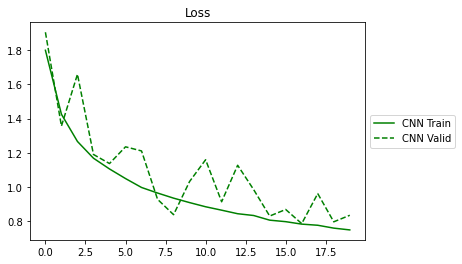

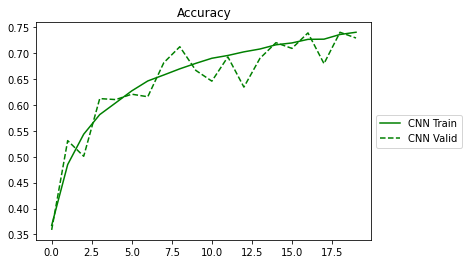

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()

plt.plot(range(len(history_cnn.history['loss'])), 
         history_cnn.history['loss'], 
         '-', label="CNN Train", color="g")

plt.plot(range(len(history_cnn.history['val_loss'])),
         history_cnn.history['val_loss'], 
         '--', label="CNN Valid", color="g")

plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure()

plt.plot(range(len(history_cnn.history['accuracy'])), 
         history_cnn.history['accuracy'], 
         '-', label="CNN Train", color="g")

plt.plot(range(len(history_cnn.history['val_accuracy'])),
         history_cnn.history['val_accuracy'], 
         '--', label="CNN Valid", color="g")
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()